### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sunspots = sm.datasets.sunspots.load_pandas().data
air = pd.read_csv('data/AirPassengers.csv')

# Sunspots trend,seasonal, and residue

In [3]:
sunspots.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [4]:
#check the dtype of the year
sunspots['YEAR']

0      1700.0
1      1701.0
2      1702.0
3      1703.0
4      1704.0
        ...  
304    2004.0
305    2005.0
306    2006.0
307    2007.0
308    2008.0
Name: YEAR, Length: 309, dtype: float64

In [5]:
# setting the YEAR as index
sunspots=sunspots.set_index('YEAR')
sunspots.head()

,SUNACTIVITY
YEAR,
1700.0,5.0
1701.0,11.0
1702.0,16.0
1703.0,23.0
1704.0,36.0


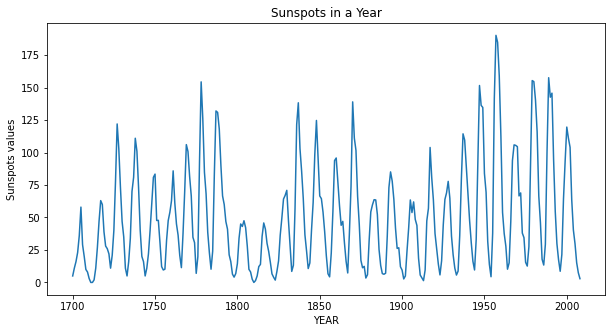

In [6]:
#plot the the sunspots
plt.figure(figsize=(10,5))
plt.plot(sunspots)
plt.xlabel('YEAR')
plt.ylabel('Sunspots values')
plt.title('Sunspots in a Year')
plt.show()

In [19]:
#decomposing the sunspots values into trand, seasonl, and residue using the statsmodel tool called seasonal_decompose
results =seasonal_decompose(sunspots,model='additive',period=11)
trend_estimate=results.trend
seasonal_estimate = results.seasonal
residue=results.resid

<Figure size 864x360 with 0 Axes>

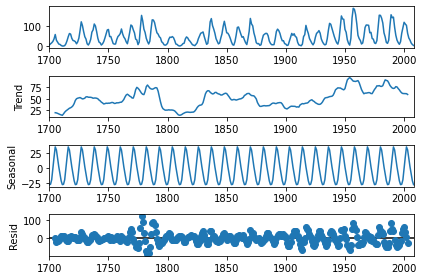

In [20]:
plt.figure(figsize=(12,5))
results.plot()
plt.show()

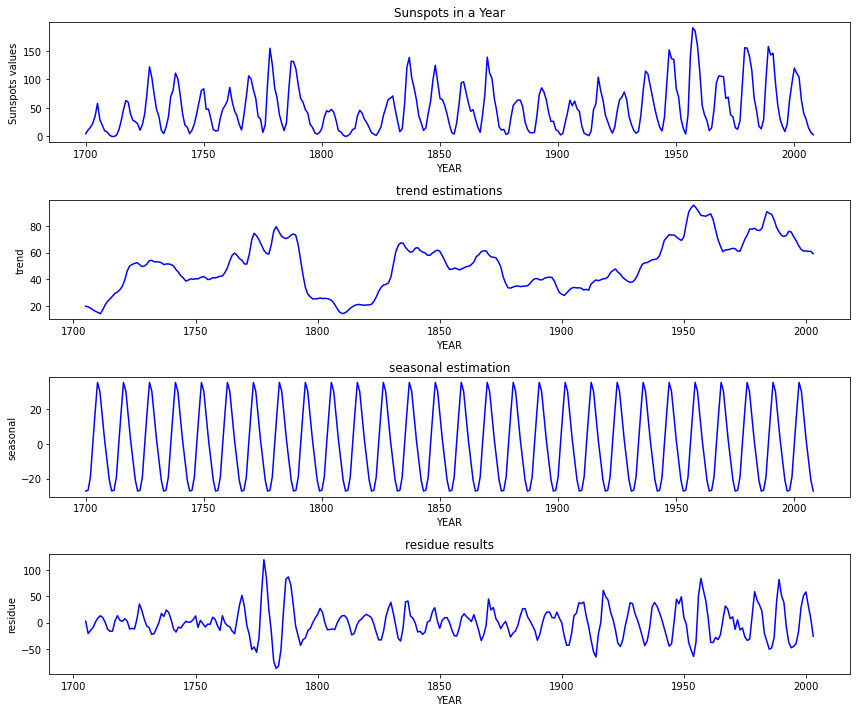

In [21]:
#plotting trend, seasonal, and residue
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(sunspots, color='blue')
plt.xlabel('YEAR')
plt.ylabel('Sunspots values')
plt.title('Sunspots in a Year')

plt.subplot(412)
plt.plot(trend_estimate, color='blue')
plt.xlabel('YEAR')
plt.ylabel('trend')
plt.title('trend estimations')

plt.subplot(413)
plt.plot(seasonal_estimate, color='blue')
plt.xlabel('YEAR')
plt.ylabel('seasonal')
plt.title('seasonal estimation')

plt.subplot(414)
plt.plot(residue, color='blue')
plt.xlabel('YEAR')
plt.ylabel('residue')
plt.title('residue results')
plt.tight_layout()



# Autocorrelation Function and Partial Autocorrelation Function

In [22]:
#check the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.graphics.tsaplots as tsaplots

In [23]:
sunspots_acf=acf(residue, fft=True)

C:\Users\kafub\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


C:\Users\kafub\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


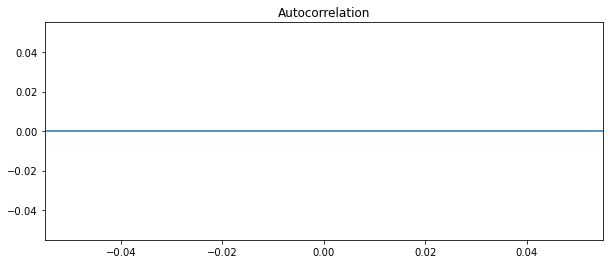

In [24]:
fig, ax=plt.subplots(figsize=(10,4))
tsaplots.plot_acf(residue,lags=20, ax=ax)
plt.show()

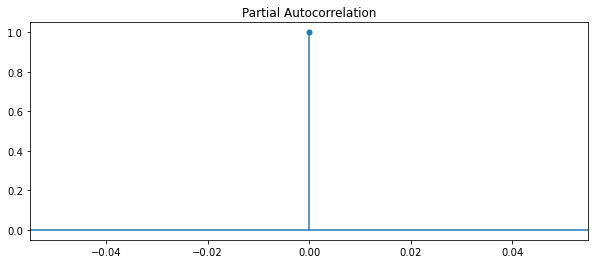

In [25]:
fig, ax=plt.subplots(figsize=(10,4))
plot_pacf(residue,lags=20, ax=ax)
plt.show()

In [26]:
# check the errors
MAEm=np.abs(residue).mean()
RMSEm=np.sqrt(np.square(residue).mean())
MAEm,RMSEm

(22.44475829396778, 29.60411456543466)

# Take difference

In [28]:
diff_residue=residue.diff().dropna()

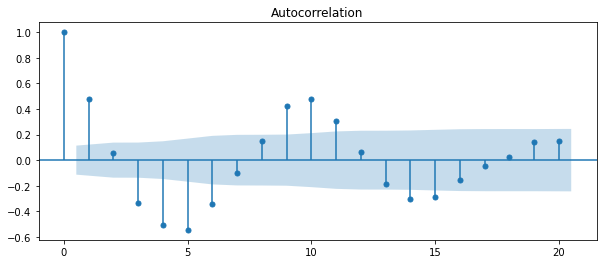

In [29]:
fig, ax=plt.subplots(figsize=(10,4))
tsaplots.plot_acf(diff_residue,lags=20, ax=ax)
plt.show()

C:\Users\kafub\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


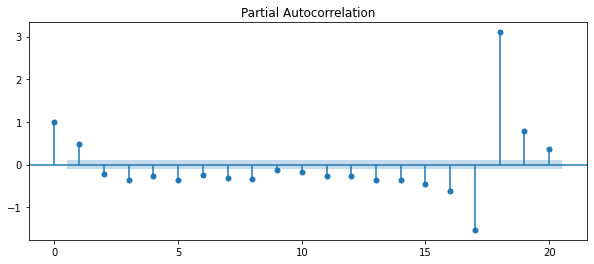

In [30]:
fig, ax=plt.subplots(figsize=(10,4))
tsaplots.plot_pacf(diff_residue,lags=20, ax=ax)
plt.show()

# Air trend,seasonal, and residue


In [31]:
air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [32]:
# check the date types
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [33]:
# First change the Month object to timestamp and set as index
air=air.set_index('Month')

In [34]:
air=air.rename(columns={'#Passengers':'Passengers'})
air.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Text(0.5, 1.0, 'Air datasets')

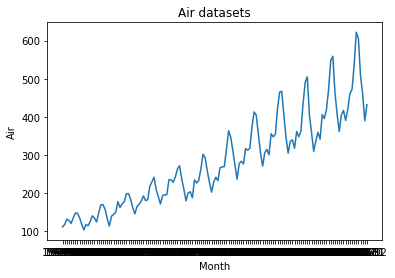

In [54]:
plt.plot(air)
plt.xlabel('Month')
plt.ylabel('Air')
plt.title('Air datasets')

In [35]:
air_add_results=seasonal_decompose(air,period=12, model='additive')

In [36]:
additive_trend=air_add_results.trend
additive_seasonal=air_add_results.seasonal
additive_residue=air_add_results.resid

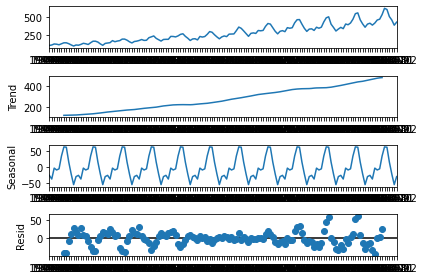

In [37]:
air_add_results.plot()
plt.show()

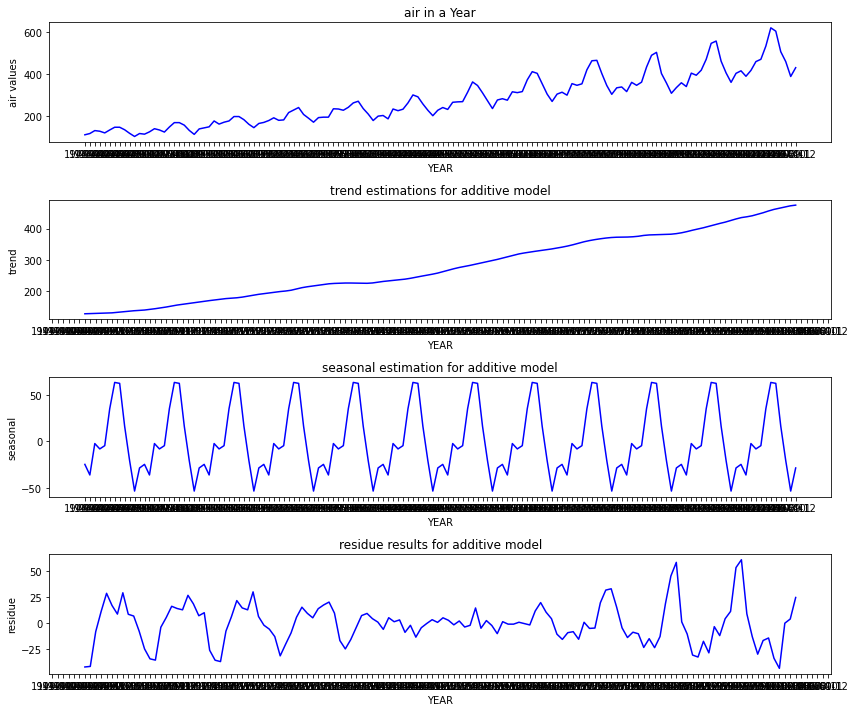

In [38]:
#plotting trend, seasonal, and residue
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(air, color='blue')
plt.xlabel('YEAR')
plt.ylabel('air values')
plt.title('air in a Year')

plt.subplot(412)
plt.plot(additive_trend, color='blue')
plt.xlabel('YEAR')
plt.ylabel('trend')
plt.title('trend estimations for additive model')

plt.subplot(413)
plt.plot(additive_seasonal, color='blue')
plt.xlabel('YEAR')
plt.ylabel('seasonal')
plt.title('seasonal estimation for additive model')

plt.subplot(414)
plt.plot(additive_residue, color='blue')
plt.xlabel('YEAR')
plt.ylabel('residue')
plt.title('residue results for additive model')
plt.tight_layout()


In [39]:
air_multi_results=seasonal_decompose(air,period=12, model='multiplicative')

In [40]:
multiplicative_trend=air_multi_results.trend
multiplicative_seasonal=air_multi_results.seasonal
multiplicative_residue=air_multi_results.resid

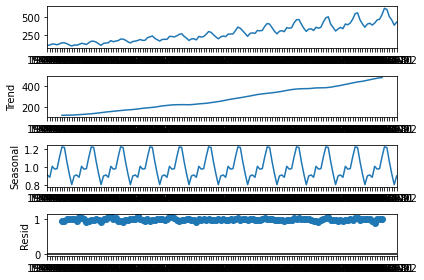

In [41]:
air_multi_results.plot()
plt.show()

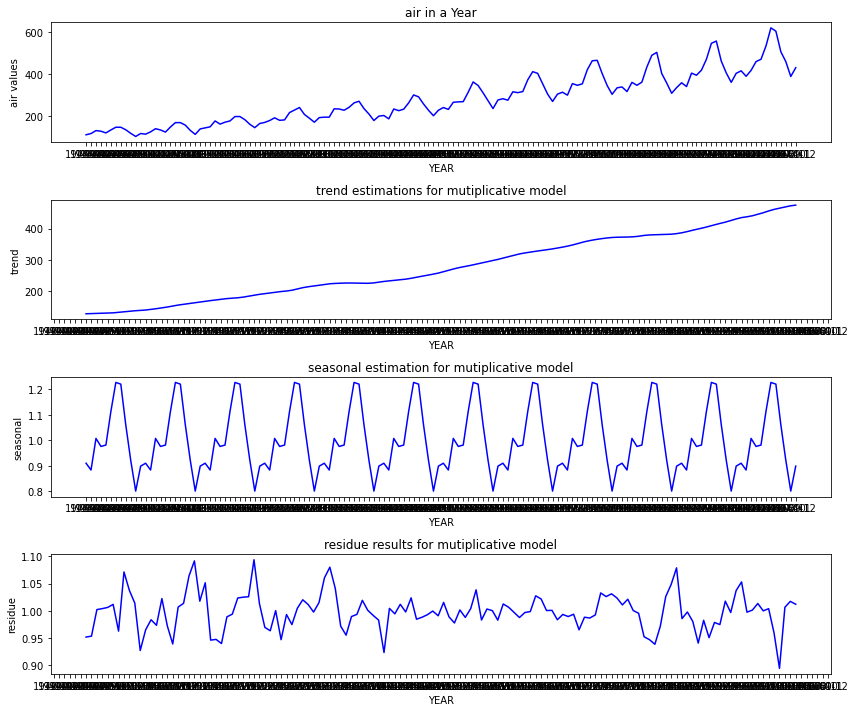

In [42]:
#plotting trend, seasonal, and residue
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(air, color='blue')
plt.xlabel('YEAR')
plt.ylabel('air values')
plt.title('air in a Year')

plt.subplot(412)
plt.plot(multiplicative_trend, color='blue')
plt.xlabel('YEAR')
plt.ylabel('trend')
plt.title('trend estimations for mutiplicative model')

plt.subplot(413)
plt.plot(multiplicative_seasonal, color='blue')
plt.xlabel('YEAR')
plt.ylabel('seasonal')
plt.title('seasonal estimation for mutiplicative model')

plt.subplot(414)
plt.plot(multiplicative_residue, color='blue')
plt.xlabel('YEAR')
plt.ylabel('residue')
plt.title('residue results for mutiplicative model')
plt.tight_layout()


# Autocorrelation Function and Partial Autocorrelation Function

In [43]:
#check the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.graphics.tsaplots as tsaplots

In [44]:
air_autocorr=acf(additive_residue, fft=True)
air_autocorr

C:\Users\kafub\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

C:\Users\kafub\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


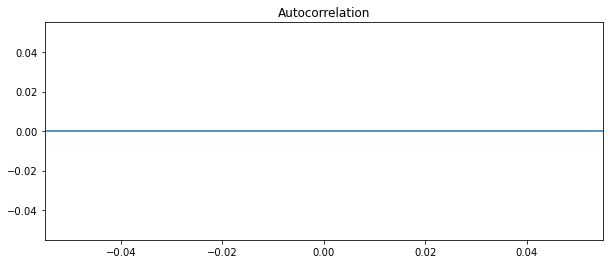

In [45]:
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(air_autocorr,ax=ax,lags=20)
plt.show()

C:\Users\kafub\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


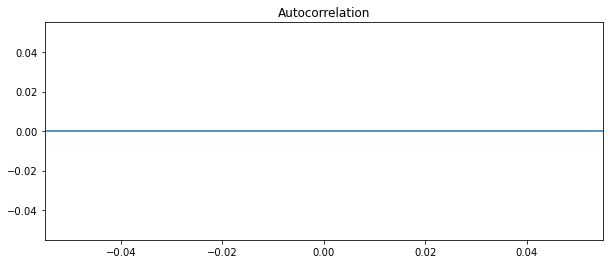

In [46]:
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(additive_residue,ax=ax,lags=20)
plt.show()


C:\Users\kafub\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


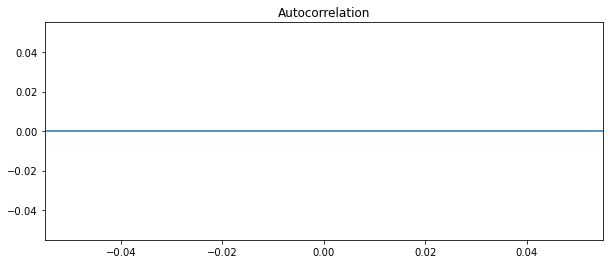

In [47]:
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(multiplicative_residue,ax=ax,lags=20)
plt.show()

# Errors 

In [48]:
# check the errors
MAEm=np.abs(additive_residue).mean()
RMSEm=np.sqrt(np.square(additive_residue).mean())
MAEm,RMSEm

(14.411807468625653, 19.281776926821834)

In [49]:
# check the errors
MAEm=np.abs(multiplicative_residue).mean()
RMSEm=np.sqrt(np.square(multiplicative_residue).mean())
MAEm,RMSEm

(0.9982356582764106, 0.9987896520729921)

# Take difference

In [50]:
diff_add_residue=additive_residue.diff().dropna()
diff_multi_residue=multiplicative_residue.diff().dropna()

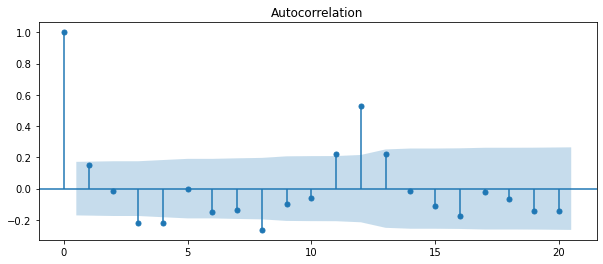

In [51]:
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(diff_add_residue,ax=ax,lags=20)
plt.show()

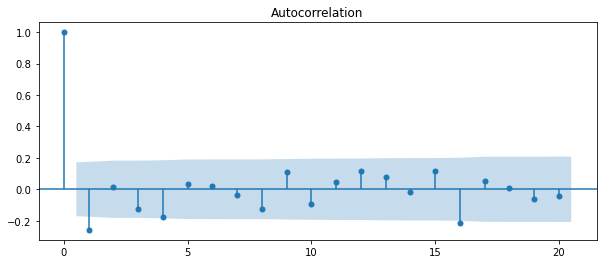

In [52]:
fig,ax =plt.subplots(figsize=(10,4))
tsaplots.plot_acf(diff_multi_residue,ax=ax,lags=20)
plt.show()